<center><img src="car.jpg" width=500></center>


Insurance companies invest a lot of time and money into optimizing their pricing and accurately estimating the likelihood that customers will make a claim. In many countries insurance it is a legal requirement to have car insurance in order to drive a vehicle on public roads, so the market is very large!

(`Source: https://www.accenture.com/_acnmedia/pdf-84/accenture-machine-leaning-insurance.pdf`) 

Knowing all of this, On the Road car insurance have requested your services in building a model to predict whether a customer will make a claim on their insurance during the policy period. As they have very little expertise and infrastructure for deploying and monitoring machine learning models, they've asked you to identify the single feature that results in the best performing model, as measured by accuracy, so they can start with a simple model in production.

They have supplied you with their customer data as a csv file called `car_insurance.csv`, along with a table detailing the column names and descriptions below.



## The dataset

| Column | Description |
|--------|-------------|
| `id` | Unique client identifier |
| `age` | Client's age: <br> <ul><li>`0`: 16-25</li><li>`1`: 26-39</li><li>`2`: 40-64</li><li>`3`: 65+</li></ul> |
| `gender` | Client's gender: <br> <ul><li>`0`: Female</li><li>`1`: Male</li></ul> |
| `driving_experience` | Years the client has been driving: <br> <ul><li>`0`: 0-9</li><li>`1`: 10-19</li><li>`2`: 20-29</li><li>`3`: 30+</li></ul> |
| `education` | Client's level of education: <br> <ul><li>`0`: No education</li><li>`1`: High school</li><li>`2`: University</li></ul> |
| `income` | Client's income level: <br> <ul><li>`0`: Poverty</li><li>`1`: Working class</li><li>`2`: Middle class</li><li>`3`: Upper class</li></ul> |
| `credit_score` | Client's credit score (between zero and one) |
| `vehicle_ownership` | Client's vehicle ownership status: <br><ul><li>`0`: Does not own their vehilce (paying off finance)</li><li>`1`: Owns their vehicle</li></ul> |
| `vehcile_year` | Year of vehicle registration: <br><ul><li>`0`: Before 2015</li><li>`1`: 2015 or later</li></ul> |
| `married` | Client's marital status: <br><ul><li>`0`: Not married</li><li>`1`: Married</li></ul> |
| `children` | Client's number of children |
| `postal_code` | Client's postal code | 
| `annual_mileage` | Number of miles driven by the client each year |
| `vehicle_type` | Type of car: <br> <ul><li>`0`: Sedan</li><li>`1`: Sports car</li></ul> |
| `speeding_violations` | Total number of speeding violations received by the client | 
| `duis` | Number of times the client has been caught driving under the influence of alcohol |
| `past_accidents` | Total number of previous accidents the client has been involved in |
| `outcome` | Whether the client made a claim on their car insurance (response variable): <br><ul><li>`0`: No claim</li><li>`1`: Made a claim</li></ul> |

In [50]:
# Import required modules
import pandas as pd
import numpy as np
from statsmodels.formula.api import logit

# Start coding!

In [51]:
df = pd.read_csv('car_insurance.csv')

In [52]:
df.describe()


,id,age,gender,credit_score,vehicle_ownership,married,children,postal_code,annual_mileage,speeding_violations,duis,past_accidents,outcome
count,10000.000000,10000.000000,10000.000000,9018.000000,10000.000000,10000.000000,10000.000000,10000.000000,9043.000000,10000.000000,10000.00000,10000.000000,10000.000000
mean,500521.906800,1.489500,0.499000,0.515813,0.697000,0.498200,0.688800,19864.548400,11697.003207,1.482900,0.23920,1.056300,0.313300
std,290030.768758,1.025278,0.500024,0.137688,0.459578,0.500022,0.463008,18915.613855,2818.434528,2.241966,0.55499,1.652454,0.463858
min,101.000000,0.000000,0.000000,0.053358,0.000000,0.000000,0.000000,10238.000000,2000.000000,0.000000,0.00000,0.000000,0.000000
25%,249638.500000,1.000000,0.000000,0.417191,0.000000,0.000000,0.000000,10238.000000,10000.000000,0.000000,0.00000,0.000000,0.000000
50%,501777.000000,1.000000,0.000000,0.525033,1.000000,0.000000,1.000000,10238.000000,12000.000000,0.000000,0.00000,0.000000,0.000000
75%,753974.500000,2.000000,1.000000,0.618312,1.000000,1.000000,1.000000,32765.000000,14000.000000,2.000000,0.00000,2.000000,1.000000
max,999976.000000,3.000000,1.000000,0.960819,1.000000,1.000000,1.000000,92101.000000,22000.000000,22.000000,6.00000,15.000000,1.000000


In [53]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   10000 non-null  int64  
 1   age                  10000 non-null  int64  
 2   gender               10000 non-null  int64  
 3   driving_experience   10000 non-null  object 
 4   education            10000 non-null  object 
 5   income               10000 non-null  object 
 6   credit_score         9018 non-null   float64
 7   vehicle_ownership    10000 non-null  float64
 8   vehicle_year         10000 non-null  object 
 9   married              10000 non-null  float64
 10  children             10000 non-null  float64
 11  postal_code          10000 non-null  int64  
 12  annual_mileage       9043 non-null   float64
 13  vehicle_type         10000 non-null  object 
 14  speeding_violations  10000 non-null  int64  
 15  duis                 10000 non-null  

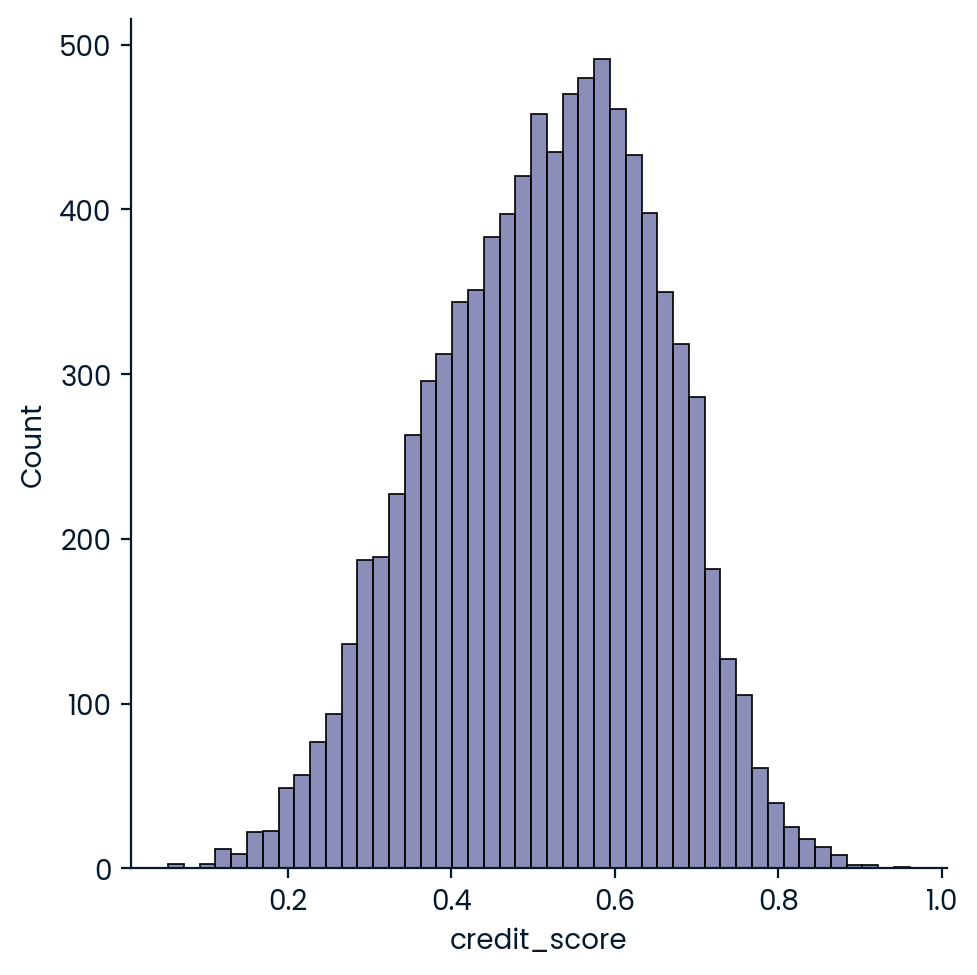

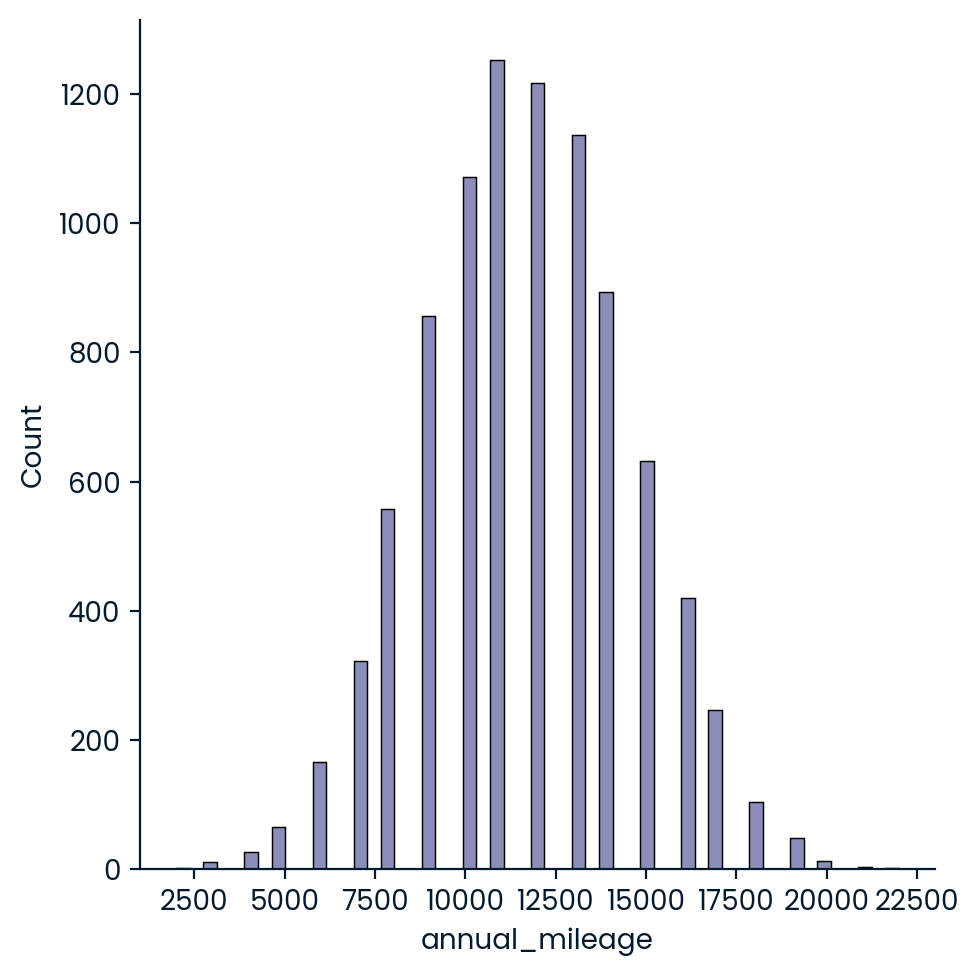

In [54]:
import seaborn as sns
sns.displot(x='credit_score', data = df)
sns.displot(x='annual_mileage', data=df)
#both normally distributed. replacing na values with mean

In [55]:
df['credit_score'].fillna(value = df['credit_score'].mean(), inplace = True)
df['annual_mileage'].fillna(value=df['annual_mileage'].mean(), inplace =  True)
print(df.isnull().sum())
#na's filled with mean value from their respective columns

id                     0
age                    0
gender                 0
driving_experience     0
education              0
income                 0
credit_score           0
vehicle_ownership      0
vehicle_year           0
married                0
children               0
postal_code            0
annual_mileage         0
vehicle_type           0
speeding_violations    0
duis                   0
past_accidents         0
outcome                0
dtype: int64


In [56]:
#initializing list for models and creating features list without id or outcome variables. 
models = []
features = df.columns.drop(labels = ['id', 'outcome'])
print(features)
    

Index(['age', 'gender', 'driving_experience', 'education', 'income',
       'credit_score', 'vehicle_ownership', 'vehicle_year', 'married',
       'children', 'postal_code', 'annual_mileage', 'vehicle_type',
       'speeding_violations', 'duis', 'past_accidents'],
      dtype='object')


In [57]:
#looping through features to create models appending to models list
for var in features:
    print(f"{var}")
    model = logit(f"outcome ~ {var}", data=df).fit()
    models.append(model)

age
Optimization terminated successfully.
         Current function value: 0.511794
         Iterations 6
gender
Optimization terminated successfully.
         Current function value: 0.615951
         Iterations 5
driving_experience
Optimization terminated successfully.
         Current function value: 0.467092
         Iterations 8
education
Optimization terminated successfully.
         Current function value: 0.603742
         Iterations 5
income
Optimization terminated successfully.
         Current function value: 0.531499
         Iterations 6
credit_score
Optimization terminated successfully.
         Current function value: 0.572557
         Iterations 6
vehicle_ownership
Optimization terminated successfully.
         Current function value: 0.552412
         Iterations 5
vehicle_year
Optimization terminated successfully.
         Current function value: 0.572668
         Iterations 6
married
Optimization terminated successfully.
         Current function value: 0.586659
     

In [58]:
#initializing accuracies list and creating for loop to find accuracies for each model
accuracies = []
for model in models:
    matrix = model.pred_table()
    TN = matrix[0,0] 
    TP = matrix[1,1]
    FN = matrix[1,0]
    FP = matrix[0,1]
    accuracy = (TN + TP) / (TN + FN + FP + TP)
    accuracies.append(accuracy)
print(accuracies)

[0.7747, 0.6867, 0.7771, 0.6867, 0.7425, 0.7054, 0.7351, 0.6867, 0.6867, 0.6867, 0.6867, 0.6904, 0.6867, 0.6867, 0.6867, 0.6867]


In [59]:
best_accuracy = accuracies.index(max(accuracies))
print(best_accuracy)
best_feature = features[best_accuracy]
print(best_feature)
best_feature_df = pd.DataFrame({'best_feature': best_feature, 'best_accuracy': accuracies[2]}, index=[0])
print(best_feature_df)

2
driving_experience
         best_feature  best_accuracy
0  driving_experience         0.7771
